In [120]:
import pandas as pd
import xarray as xr
from pathlib import Path
import datetime
from cftime import num2date
import matplotlib.pyplot as plt
import numpy as np

In [121]:
# Define the folder path containing the NetCDF files
folder_path = Path('inputs\WindData')
datasets = []  # List to store datasets

for file in folder_path.iterdir():
    ds = xr.open_dataset(file)  # Open each NetCDF file
    datasets.append(ds)  # Store dataset in list

# Concatenate along a specific dimension (e.g., 'time' if it exists)
combined_ds = xr.concat(datasets, dim='valid_time')

# Convert the combined dataset to a pandas DataFrame
WindData = combined_ds.to_dataframe().reset_index()


In [122]:
# Display the combined dataset
WindData

,valid_time,latitude,longitude,number,expver,u10,v10,u100,v100
0,1997-01-01 00:00:00,8.00,55.50,0,0001,-5.129883,-7.070343,-5.775009,-7.893539
1,1997-01-01 00:00:00,8.00,55.75,0,0001,-5.128906,-7.074249,-5.767197,-7.916000
2,1997-01-01 00:00:00,7.75,55.50,0,0001,-5.064453,-7.151398,-5.692978,-7.980453
3,1997-01-01 00:00:00,7.75,55.75,0,0001,-5.052734,-7.126007,-5.681259,-7.950180
4,1997-01-01 01:00:00,8.00,55.50,0,0001,-5.460739,-7.175369,-6.158142,-8.034683
...,...,...,...,...,...,...,...,...,...
946651,2023-12-31 22:00:00,7.75,55.75,0,0001,-4.193115,-4.812347,-4.692459,-5.313354
946652,2023-12-31 23:00:00,8.00,55.50,0,0001,-3.792526,-5.225235,-4.245819,-5.772034
946653,2023-12-31 23:00:00,8.00,55.75,0,0001,-3.910690,-5.023087,-4.380585,-5.562073
946654,2023-12-31 23:00:00,7.75,55.50,0,0001,-3.795456,-5.147110,-4.232147,-5.684143


In [123]:
# Separate the wind speeds in the four different points, using the latitude and longitude information

WindData = WindData.rename(columns={'number': 'location'}) # Change the meaning of the existing column 'number' which was not being used

WindData['location'] = list(zip(WindData['latitude'], WindData['longitude'])) # Combines latitude and longitude on the column location



In [124]:
WindData

,valid_time,latitude,longitude,location,expver,u10,v10,u100,v100
0,1997-01-01 00:00:00,8.00,55.50,"(8.0, 55.5)",0001,-5.129883,-7.070343,-5.775009,-7.893539
1,1997-01-01 00:00:00,8.00,55.75,"(8.0, 55.75)",0001,-5.128906,-7.074249,-5.767197,-7.916000
2,1997-01-01 00:00:00,7.75,55.50,"(7.75, 55.5)",0001,-5.064453,-7.151398,-5.692978,-7.980453
3,1997-01-01 00:00:00,7.75,55.75,"(7.75, 55.75)",0001,-5.052734,-7.126007,-5.681259,-7.950180
4,1997-01-01 01:00:00,8.00,55.50,"(8.0, 55.5)",0001,-5.460739,-7.175369,-6.158142,-8.034683
...,...,...,...,...,...,...,...,...,...
946651,2023-12-31 22:00:00,7.75,55.75,"(7.75, 55.75)",0001,-4.193115,-4.812347,-4.692459,-5.313354
946652,2023-12-31 23:00:00,8.00,55.50,"(8.0, 55.5)",0001,-3.792526,-5.225235,-4.245819,-5.772034
946653,2023-12-31 23:00:00,8.00,55.75,"(8.0, 55.75)",0001,-3.910690,-5.023087,-4.380585,-5.562073
946654,2023-12-31 23:00:00,7.75,55.50,"(7.75, 55.5)",0001,-3.795456,-5.147110,-4.232147,-5.684143


In [125]:
# Convert from cartessian cordinates of velocity to polar coordinates to obtain wind direction and speed, for every location

WindData['ws_10'] = (WindData['u10']**2 + WindData['v10']**2)**0.5
WindData['wd_10'] = (np.arctan2(WindData['u10'], WindData['v10']) * 360 / (2 * np.pi)) % 360  # Wind direction in degrees (0, 360)



WindData['ws_100'] = (WindData['u100']**2 + WindData['v100']**2)**0.5
WindData['wd_100'] = (np.arctan2(WindData['u100'], WindData['v100']) * 360 / (2 * np.pi)) % 360  # Wind direction in degrees

#separate the wind speeds in the four locations
Location_1 = WindData[WindData['location'] == (7.75, 55.5)]
Location_2 = WindData[WindData['location'] == (8, 55.5)]
Location_3 = WindData[WindData['location'] == (7.75, 55.75)]
Location_4 = WindData[WindData['location'] == (8, 55.75)]

Location_1


,valid_time,latitude,longitude,location,expver,u10,v10,u100,v100,ws_10,wd_10,ws_100,wd_100
2,1997-01-01 00:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.064453,-7.151398,-5.692978,-7.980453,8.763058,215.305252,9.802940,215.502747
6,1997-01-01 01:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.412888,-7.168533,-6.093689,-8.018082,8.982607,217.056091,10.070883,217.234604
10,1997-01-01 02:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.794968,-7.286667,-6.540344,-8.170639,9.310057,218.494659,10.465919,218.676193
14,1997-01-01 03:00:00,7.75,55.5,"(7.75, 55.5)",0001,-6.116409,-7.345795,-6.927292,-8.274216,9.558826,219.782150,10.791201,219.936554
18,1997-01-01 04:00:00,7.75,55.5,"(7.75, 55.5)",0001,-6.399673,-7.414078,-7.274658,-8.381561,9.794099,220.800064,11.098253,220.955887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946638,2023-12-31 19:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.853882,-5.125351,-6.685028,-5.842255,7.780563,228.796310,8.878150,228.848770
946642,2023-12-31 20:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.822296,-4.957687,-6.579819,-5.582153,7.647078,229.585602,8.628699,229.689575
946646,2023-12-31 21:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.104568,-4.827011,-5.758743,-5.412628,7.025429,226.600830,7.903143,226.774597
946650,2023-12-31 22:00:00,7.75,55.5,"(7.75, 55.5)",0001,-4.149170,-5.090668,-4.661209,-5.626831,6.567382,219.181900,7.306716,219.638000


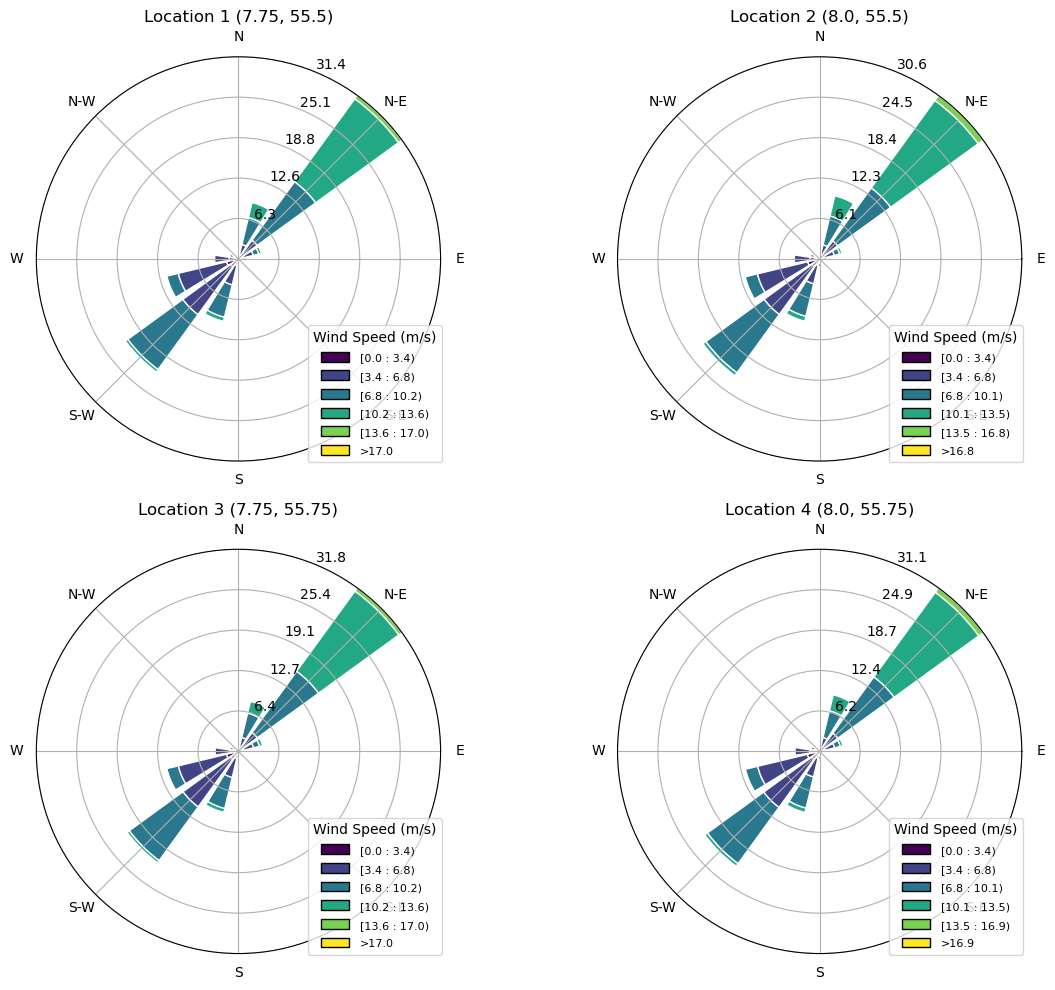

In [126]:
from windrose import WindroseAxes

# Create a 2x2 subplot for wind rose plots
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'windrose'}, figsize=(12, 10))

# Plot for Location_1
axes[0, 0].bar(Location_1['wd_10'], Location_1['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[0, 0].set_title("Location 1 (7.75, 55.5)")
axes[0, 0].set_legend(title="Wind Speed (m/s)", loc='lower right')

# Plot for Location_2
axes[0, 1].bar(Location_2['wd_10'], Location_2['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[0, 1].set_title("Location 2 (8.0, 55.5)")
axes[0, 1].set_legend(title="Wind Speed (m/s)", loc='lower right')

# Plot for Location_3
axes[1, 0].bar(Location_3['wd_10'], Location_3['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[1, 0].set_title("Location 3 (7.75, 55.75)")
axes[1, 0].set_legend(title="Wind Speed (m/s)", loc='lower right')

# Plot for Location_4
axes[1, 1].bar(Location_4['wd_10'], Location_4['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[1, 1].set_title("Location 4 (8.0, 55.75)")
axes[1, 1].set_legend(title="Wind Speed (m/s)", loc='lower right')

plt.tight_layout()
plt.show()

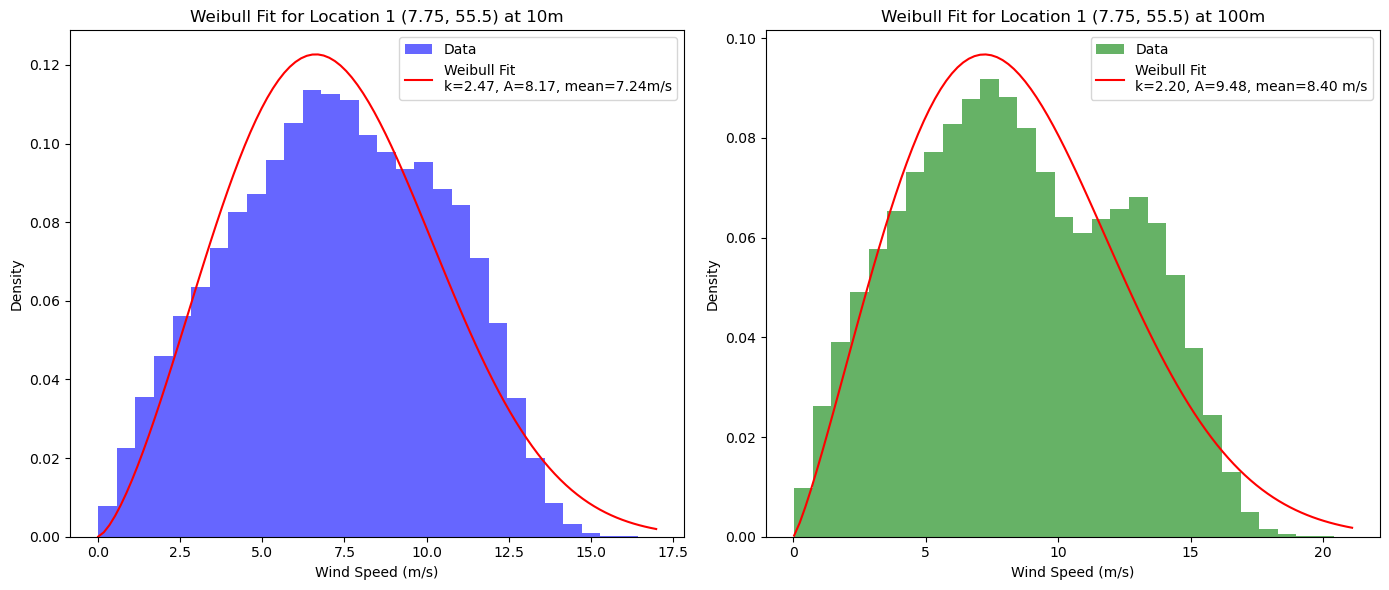

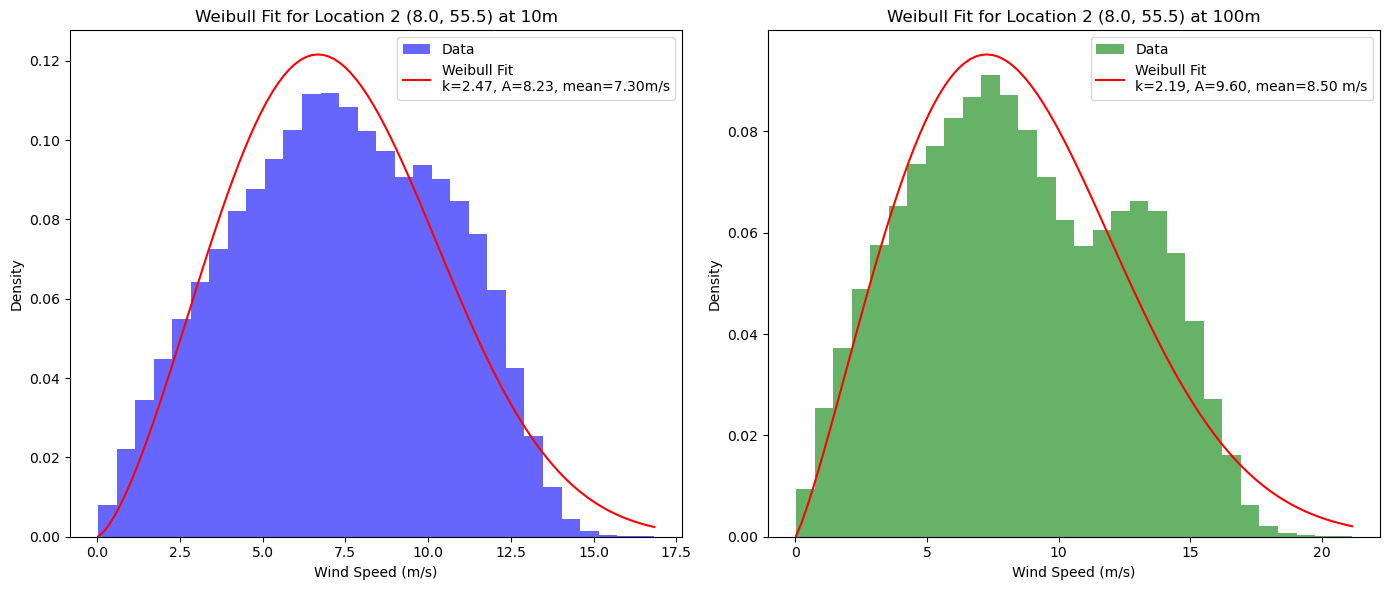

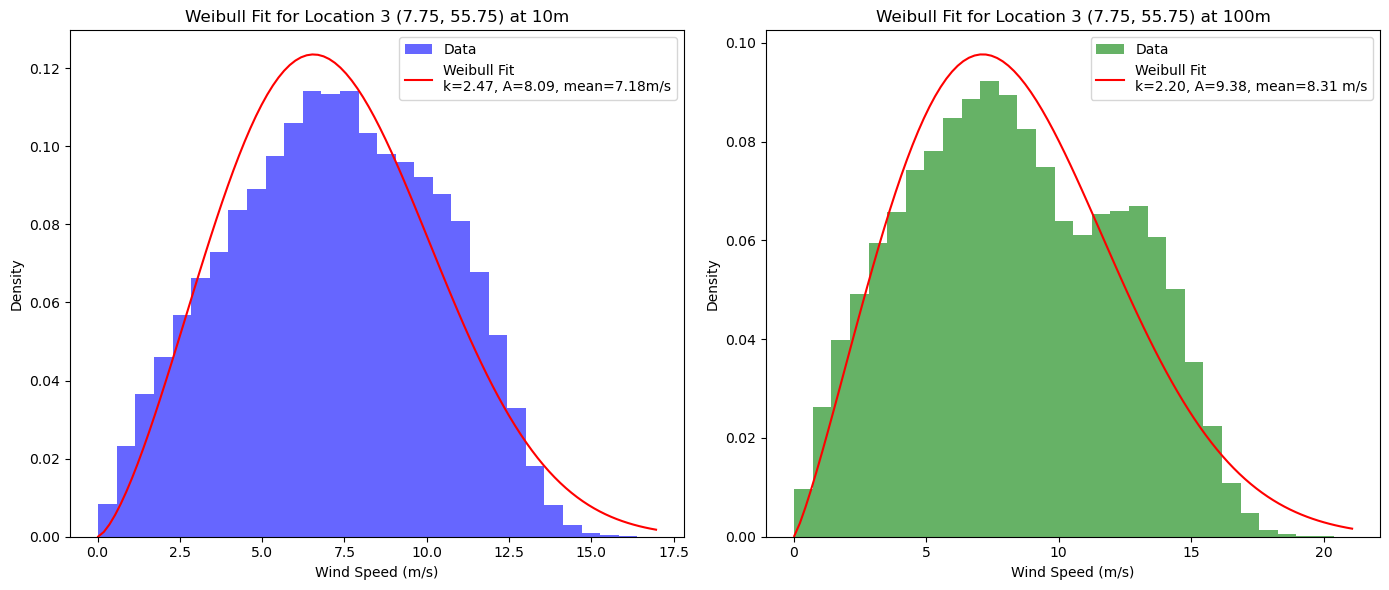

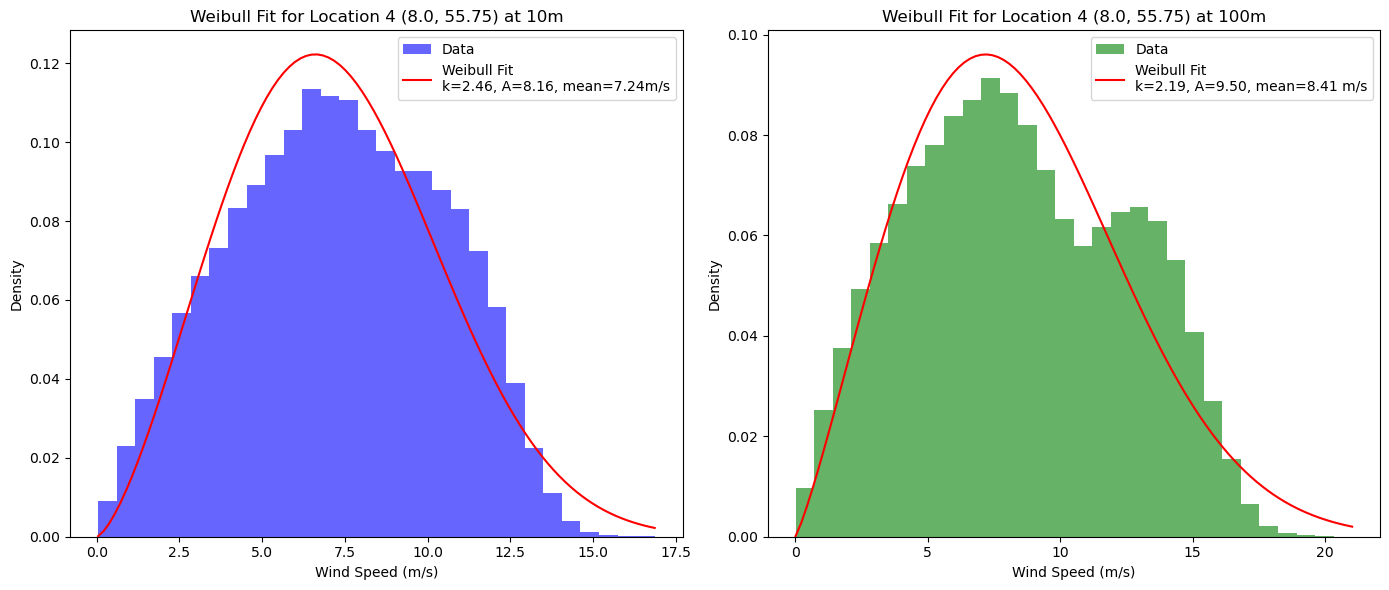

In [127]:
from scipy.special import gamma

# Array to store mean wind speeds
mean_speeds = []

# Function to fit Weibull distribution, plot, and calculate mean speed
def fit_weibull_and_store_mean(location_data, location_name):
    # Extract wind speed data at 10m and 100m heights
    wind_speeds_10 = location_data['ws_10']
    wind_speeds_100 = location_data['ws_100']
    
    # Fit Weibull distribution for 10m
    shape_10, loc_10, scale_10 = weibull_min.fit(wind_speeds_10, floc=0)  # Fix location to 0
    mean_10 = scale_10 * gamma(1 + 1 / shape_10)  # Calculate mean speed for 10m
    
    # Fit Weibull distribution for 100m
    shape_100, loc_100, scale_100 = weibull_min.fit(wind_speeds_100, floc=0)  # Fix location to 0
    mean_100 = scale_100 * gamma(1 + 1 / shape_100)  # Calculate mean speed for 100m
    
    # Store mean speeds in the array
    mean_speeds.append({'location': location_name, 'mean_10m': mean_10, 'mean_100m': mean_100})
    
    # Generate data for plotting
    x_10 = np.linspace(wind_speeds_10.min(), wind_speeds_10.max(), 100)
    pdf_10 = weibull_min.pdf(x_10, shape_10, loc_10, scale_10)
    
    x_100 = np.linspace(wind_speeds_100.min(), wind_speeds_100.max(), 100)
    pdf_100 = weibull_min.pdf(x_100, shape_100, loc_100, scale_100)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot for 10m
    axes[0].hist(wind_speeds_10, bins=30, density=True, alpha=0.6, color='blue', label='Data')
    axes[0].plot(x_10, pdf_10, 'r-', label=f'Weibull Fit\nk={shape_10:.2f}, A={scale_10:.2f}, mean={mean_10:.2f}m/s')
    axes[0].set_title(f'Weibull Fit for {location_name} at 10m')
    axes[0].set_xlabel('Wind Speed (m/s)')
    axes[0].set_ylabel('Density')
    axes[0].legend()
    
    # Plot for 100m
    axes[1].hist(wind_speeds_100, bins=30, density=True, alpha=0.6, color='green', label='Data')
    axes[1].plot(x_100, pdf_100, 'r-', label=f'Weibull Fit\nk={shape_100:.2f}, A={scale_100:.2f}, mean={mean_100:.2f} m/s')
    axes[1].set_title(f'Weibull Fit for {location_name} at 100m')
    axes[1].set_xlabel('Wind Speed (m/s)')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Fit Weibull distribution and store mean speeds for each location
fit_weibull_and_store_mean(Location_1, "Location 1 (7.75, 55.5)")
fit_weibull_and_store_mean(Location_2, "Location 2 (8.0, 55.5)")
fit_weibull_and_store_mean(Location_3, "Location 3 (7.75, 55.75)")
fit_weibull_and_store_mean(Location_4, "Location 4 (8.0, 55.75)")


In [128]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np

# Coordinates and data organization
points = np.array([[7.75, 55.5], [8, 55.5], [7.75, 55.75], [8, 55.75]])
x_coords = np.unique(points[:, 0])  # [7.75, 8.0]
y_coords = np.unique(points[:, 1])  # [55.5, 55.75]

# Extract wind speed and direction data
ws_data10 = np.array([loc['ws_10'].values for loc in [Location_1, Location_2, Location_3, Location_4]])
wd_data10 = np.array([loc['wd_10'].values for loc in [Location_1, Location_2, Location_3, Location_4]])
ws_data100 = np.array([loc['ws_100'].values for loc in [Location_1, Location_2, Location_3, Location_4]])
wd_data100 = np.array([loc['wd_100'].values for loc in [Location_1, Location_2, Location_3, Location_4]])

# Reshape into (2,2,time)
ws_grid10 = ws_data10.reshape(2, 2, -1)
ws_grid100 = ws_data100.reshape(2, 2, -1)

wd_grid10 = wd_data10.reshape(2, 2, -1)
wd_grid100 = wd_data100.reshape(2, 2, -1)

# Wind direction conversion into vectors
def degree_to_vector(degrees):
    rad = np.deg2rad(degrees)
    return np.stack([np.cos(rad), np.sin(rad)], axis=-1)

wd_vectors10 = degree_to_vector(wd_grid10)  # shape (2, 2, time, 2)
wd_vectors100 = degree_to_vector(wd_grid100)

# Prepare interpolators for each time step
# Important: RegularGridInterpolator expects input grid matching the first two dims
ws_interpolators10 = [RegularGridInterpolator((x_coords, y_coords), ws_grid10[:, :, t], method='linear') for t in range(ws_grid10.shape[2])]
ws_interpolators100 = [RegularGridInterpolator((x_coords, y_coords), ws_grid100[:, :, t], method='linear') for t in range(ws_grid100.shape[2])]

wd_interpolators10 = [RegularGridInterpolator((x_coords, y_coords), wd_vectors10[:, :, t, :], method='linear') for t in range(wd_vectors10.shape[2])]
wd_interpolators100 = [RegularGridInterpolator((x_coords, y_coords), wd_vectors100[:, :, t, :], method='linear') for t in range(wd_vectors100.shape[2])]

# Define your target
target = (7.90, 55.60)  # (x, y)

# Interpolate across all time steps
interp_speed10 = np.array([interp(target) for interp in ws_interpolators10])
interp_speed100 = np.array([interp(target) for interp in ws_interpolators100])

interp_vector10 = np.array([interp(target) for interp in wd_interpolators10])
interp_vector100 = np.array([interp(target) for interp in wd_interpolators100])

# Convert vectors back to degrees
interp_wd10 = np.rad2deg(np.arctan2(interp_vector10[:, 1], interp_vector10[:, 0])) % 360
interp_wd100 = np.rad2deg(np.arctan2(interp_vector100[:, 1], interp_vector100[:, 0])) % 360

# Example output for first time step
print(f"Interpolated wind speed at 10m (first timestep): {interp_speed10[0]:.2f} m/s")
print(f"Interpolated wind direction at 10m (first timestep): {interp_wd10[0]:.1f} degrees")
print("---------------------------------------------------------------------")
print(f"Interpolated wind speed at 100m (first timestep): {interp_speed100[0]:.2f} m/s")
print(f"Interpolated wind direction at 100m (first timestep): {interp_wd100[0]:.1f} degrees")


Interpolated wind speed at 10m (first timestep): 8.74 m/s
Interpolated wind direction at 10m (first timestep): 215.6 degrees
---------------------------------------------------------------------
Interpolated wind speed at 100m (first timestep): 9.79 m/s
Interpolated wind direction at 100m (first timestep): 215.8 degrees


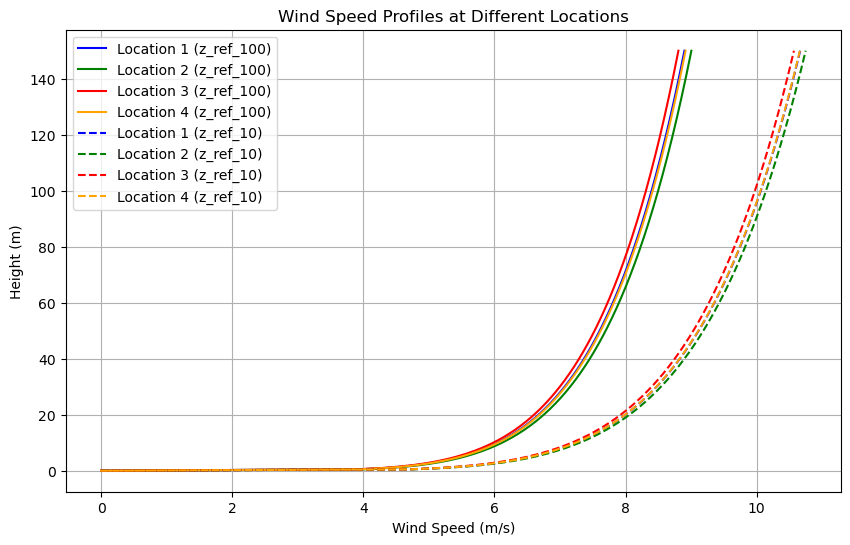

Wind Speed at Target Height (70 m):
Location 1: 9.564124288198506 m/s
Location 2: 9.639813301542127 m/s
Location 3: 9.479235787905038 m/s
Location 4: 9.560761857581307 m/s


C:\Users\srodr\AppData\Local\Temp\ipykernel_22088\4253733372.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Location_1[f'ws_{z_target}'] = mean_speeds[0]['mean_10m'] * (z_target / z_ref_10)**alpha
C:\Users\srodr\AppData\Local\Temp\ipykernel_22088\4253733372.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Location_2[f'ws_{z_target}'] = mean_speeds[1]['mean_10m'] * (z_target / z_ref_10)**alpha
C:\Users\srodr\AppData\Local\Temp\ipykernel_22088\4253733372.py:46: SettingWithCopyWarning: 
A value is tr

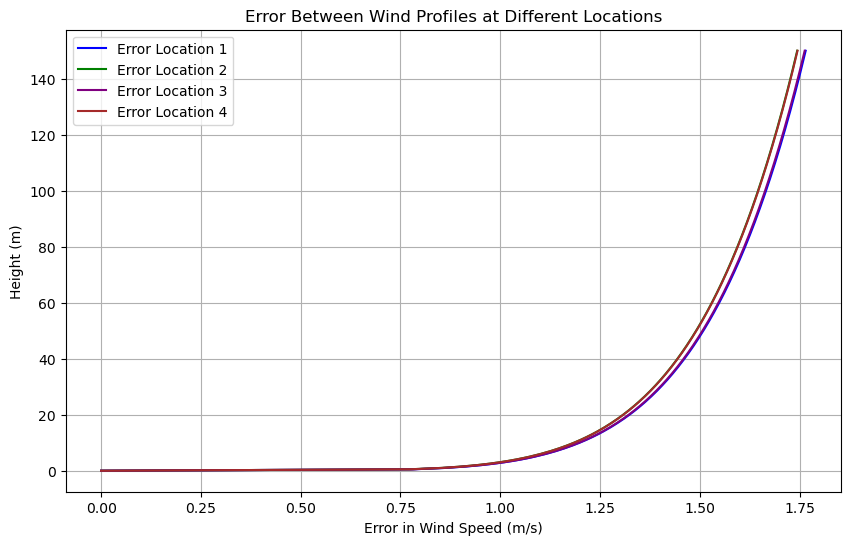

In [129]:
# Define the reference heights and target height
z_ref_10 = 10  # Reference height for ws_10
z_ref_100 = 100  # Reference height for ws_100
alpha = 1 / 7  # Wind shear exponent (empirical for neutral stability conditions)

z_target = 70  # Set the target height

z = np.linspace(0, 150, 300)  # Heights from 0 to 100 m

# Compute wind profiles using z_ref_100 as the reference height
u_location1 = mean_speeds[0]['mean_100m'] * (z / z_ref_100)**alpha
u_location2 = mean_speeds[1]['mean_100m'] * (z / z_ref_100)**alpha
u_location3 = mean_speeds[2]['mean_100m'] * (z / z_ref_100)**alpha
u_location4 = mean_speeds[3]['mean_100m'] * (z / z_ref_100)**alpha

# Compute wind profiles using z_ref_10 as the reference height
u_location1_ref10 = mean_speeds[0]['mean_10m'] * (z / z_ref_10)**alpha
u_location2_ref10 = mean_speeds[1]['mean_10m'] * (z / z_ref_10)**alpha
u_location3_ref10 = mean_speeds[2]['mean_10m'] * (z / z_ref_10)**alpha
u_location4_ref10 = mean_speeds[3]['mean_10m'] * (z / z_ref_10)**alpha

plt.figure(figsize=(10, 6))

# Plot wind profiles using z_ref_100 as the reference height
plt.plot(u_location1, z, label='Location 1 (z_ref_100)', color='blue')
plt.plot(u_location2, z, label='Location 2 (z_ref_100)', color='green')
plt.plot(u_location3, z, label='Location 3 (z_ref_100)', color='red')
plt.plot(u_location4, z, label='Location 4 (z_ref_100)', color='orange')

# Plot wind profiles using z_ref_10 as the reference height with dashed lines
plt.plot(u_location1_ref10, z, '--', label='Location 1 (z_ref_10)', color='blue')
plt.plot(u_location2_ref10, z, '--', label='Location 2 (z_ref_10)', color='green')
plt.plot(u_location3_ref10, z, '--', label='Location 3 (z_ref_10)', color='red')
plt.plot(u_location4_ref10, z, '--', label='Location 4 (z_ref_10)', color='orange')

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Height (m)')
plt.title('Wind Speed Profiles at Different Locations')
plt.legend()
plt.grid()
plt.show()

# Compute wind speed at z_target for each location using the power law profile
Location_1[f'ws_{z_target}'] = mean_speeds[0]['mean_10m'] * (z_target / z_ref_10)**alpha
Location_2[f'ws_{z_target}'] = mean_speeds[1]['mean_10m'] * (z_target / z_ref_10)**alpha
Location_3[f'ws_{z_target}'] = mean_speeds[2]['mean_10m'] * (z_target / z_ref_10)**alpha
Location_4[f'ws_{z_target}'] = mean_speeds[3]['mean_10m'] * (z_target / z_ref_10)**alpha

# Display the wind speed at the target height for each location
print(f"Wind Speed at Target Height ({z_target} m):")
print(f"Location 1: {Location_1[f'ws_{z_target}'].values[0]} m/s")
print(f"Location 2: {Location_2[f'ws_{z_target}'].values[0]} m/s")
print(f"Location 3: {Location_3[f'ws_{z_target}'].values[0]} m/s")
print(f"Location 4: {Location_4[f'ws_{z_target}'].values[0]} m/s")

# Calculate the error between the two wind profiles for all locations
error_location1 = np.abs(u_location1 - u_location1_ref10)
error_location2 = np.abs(u_location2 - u_location2_ref10)
error_location3 = np.abs(u_location3 - u_location3_ref10)
error_location4 = np.abs(u_location4 - u_location4_ref10)

# Plot the error for all locations
plt.figure(figsize=(10, 6))
plt.plot(error_location1, z, label='Error Location 1', color='blue')
plt.plot(error_location2, z, label='Error Location 2', color='green')
plt.plot(error_location3, z, label='Error Location 3', color='purple')
plt.plot(error_location4, z, label='Error Location 4', color='brown')

plt.xlabel('Error in Wind Speed (m/s)')
plt.ylabel('Height (m)')
plt.title('Error Between Wind Profiles at Different Locations')
plt.legend()
plt.grid()
plt.show()



Weibull parameters at 100m: k=2.20, A=9.47, mean=8.39m/s
Wind speed at target height (70m): 7.97 m/s


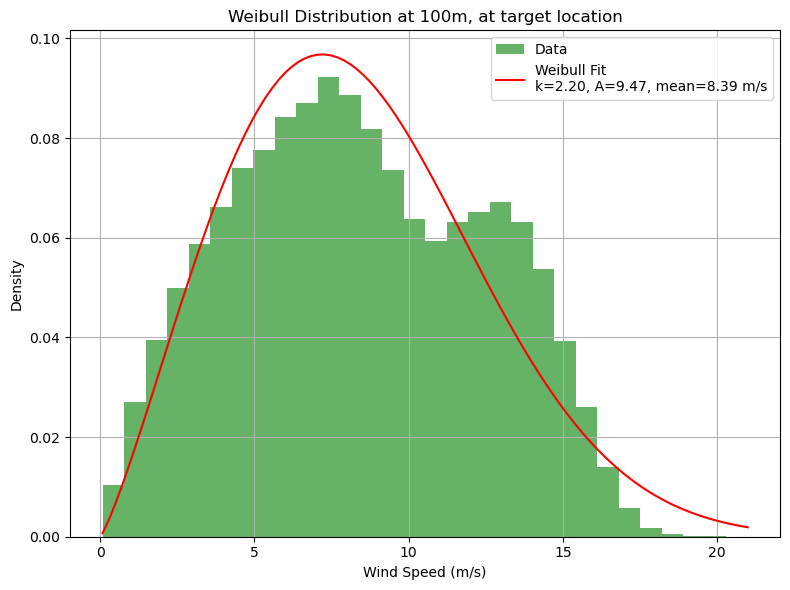

In [130]:
'''For WRA, it is more accurate to use the wind speed reference as close to the hub height as possible. So the bes option is to use the wind speed at 100 m height.'''

# Fit Weibull distribution for wind speed at 100m height, using the extrapolated ws and wd data calculated before
k_ext, loc_100, A_ext = weibull_min.fit(interp_speed100, floc=0)  # Fix location to 0
u_mean_ext = A_ext * gamma(1 + 1 / k_ext)  # Calculate mean speed for 100m

# Compute wind speed at z_target using the power law profile
ws_z_target = u_mean_ext * (z_target / z_ref_100) ** alpha

# Display results
print(f'Weibull parameters at 100m: k={k_ext:.2f}, A={A_ext:.2f}, mean={u_mean_ext:.2f}m/s')
print(f'Wind speed at target height ({z_target}m): {ws_z_target:.2f} m/s')

# Generate data for plotting Weibull distribution at 100m
x_100 = np.linspace(interp_speed100.min(), interp_speed100.max(), 100)
pdf_100 = weibull_min.pdf(x_100, k_ext, loc_100, A_ext)

# Create a plot for the Weibull distribution at 100m
plt.figure(figsize=(8, 6))
plt.hist(interp_speed100, bins=30, density=True, alpha=0.6, color='green', label='Data')
plt.plot(x_100, pdf_100, 'r-', label=f'Weibull Fit\nk={k_ext:.2f}, A={A_ext:.2f}, mean={u_mean_ext:.2f} m/s')
plt.title('Weibull Distribution at 100m, at target location')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


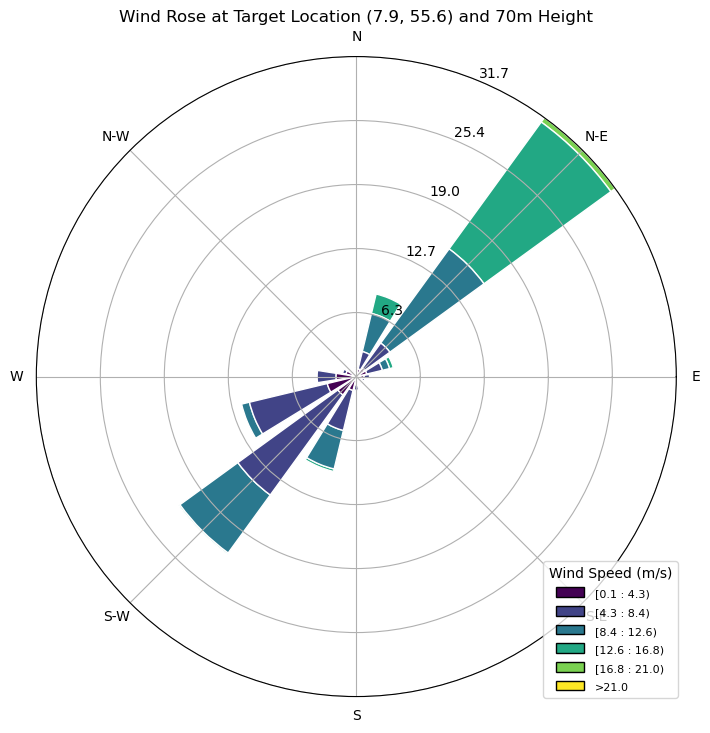

In [ ]:
from windrose import WindroseAxes


u10, v10 = degree_to_vector(interp_wd10)
u100, v100 = degree_to_vector(interp_wd100)

def linear_interp(z0, z1, v0, v1, z_target):
    return v0 + (v1 - v0) * (z_target - z0) / (z1 - z0)

# Interpolate u and v separately
u_target = linear_interp(10, 100, u10, u100, z_target)
v_target = linear_interp(10, 100, v10, v100, z_target)

wd_target = (np.rad2deg(np.arctan2(v_target, u_target))) % 360

# Extract interpolated wind direction and speed at the target location and z_target height
wd_target = interp_wd100  # Wind direction at z_target height
ws_target = interp_speed100  # Wind speed at z_target height

# Create a wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wd_target, ws_target, normed=True, opening=0.8, edgecolor='white')
ax.set_title(f"Wind Rose at Target Location ({target[0]}, {target[1]}) and {z_target}m Height")
ax.set_legend(title="Wind Speed (m/s)", loc='lower right')
plt.show()